In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
data=loadmat('ex7data1.mat')

In [3]:
data

{'X': array([[ 3.38156267,  3.38911268],
        [ 4.52787538,  5.8541781 ],
        [ 2.65568187,  4.41199472],
        [ 2.76523467,  3.71541365],
        [ 2.84656011,  4.17550645],
        [ 3.89067196,  6.48838087],
        [ 3.47580524,  3.63284876],
        [ 5.91129845,  6.68076853],
        [ 3.92889397,  5.09844661],
        [ 4.56183537,  5.62329929],
        [ 4.57407171,  5.39765069],
        [ 4.37173356,  5.46116549],
        [ 4.19169388,  4.95469359],
        [ 5.24408518,  4.66148767],
        [ 2.8358402 ,  3.76801716],
        [ 5.63526969,  6.31211438],
        [ 4.68632968,  5.6652411 ],
        [ 2.85051337,  4.62645627],
        [ 5.1101573 ,  7.36319662],
        [ 5.18256377,  4.64650909],
        [ 5.70732809,  6.68103995],
        [ 3.57968458,  4.80278074],
        [ 5.63937773,  6.12043594],
        [ 4.26346851,  4.68942896],
        [ 2.53651693,  3.88449078],
        [ 3.22382902,  4.94255585],
        [ 4.92948801,  5.95501971],
        [ 5.79295774,  

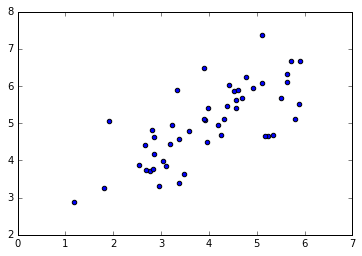

In [5]:
X=data['X']
plt.scatter(X[:,0],X[:,1])

In [9]:
def pca(X):
    m,n=X.shape
    for i in range(n):
        X[:,i]=(X[:,i]-X[:,i].mean())/X[:,i].std()
    covar=X.T.dot(X)/m
    U,S,V=np.linalg.svd(covar)
    return U,S,V

In [17]:
U,S,V=pca(X)

In [18]:
U,S,V

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([ 1.73553038,  0.26446962]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [25]:
def n_to_k(X,U,k):
    U_reduced=U[:,:k]
    Z=U_reduced.T.dot(X.T)
    return Z


In [26]:
def reconstruct(Z,U,k):
    U_reduced=U[:,:k]
    return U_reduced.dot(Z)

In [27]:
Z=n_to_k(X,U,1)
X_proj=reconstruct(Z,U,1)

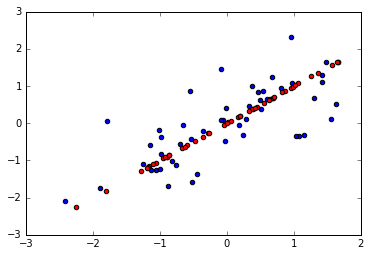

In [29]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(X_proj[0],X_proj[1],c='r')

In [32]:
faces=loadmat('ex7faces.mat')
X=faces['X']
X.shape

(5000, 1024)

In [53]:
rn=np.random.randint(0,4999,25)

In [56]:
def print_faces(X,rn):
    n=int(X.shape[1]**0.5)
    cnt=1
    for i in rn:
        xi=X[i]
        xi=np.reshape(xi,(n,n)).T
        plt.subplot(5,5,cnt)
        plt.imshow(xi,cmap='gray')
        plt.axis('off')
        cnt+=1
    plt.subplots_adjust(wspace=0,hspace=0)

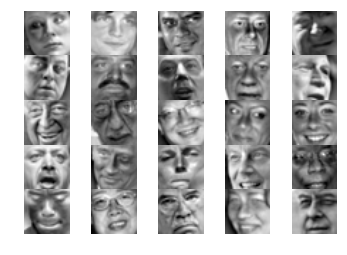

In [57]:
print_faces(X,rn)

In [58]:
U,S,V=pca(X)

In [59]:
Z=n_to_k(X,U,100)
Z.shape

(100, 5000)

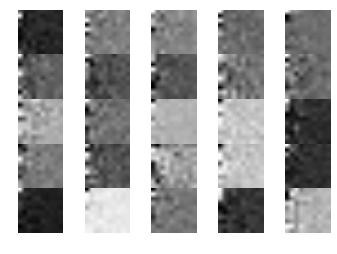

In [61]:
print_faces(Z.T,rn)

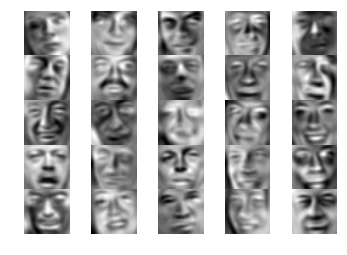

In [62]:
X_rec=reconstruct(Z,U,100)
print_faces(X_rec.T,rn)